# Introduction to Machine Learning with Python

### at #PyConKE conference 2018

In [1]:
%load_ext watermark
%watermark -a "Billy Odera" -u -d -p numpy,scipy,matplotlib,seaborn,sklearn,pandas

Billy Odera 
last updated: 2018-10-25 

numpy 1.14.3
scipy 1.1.0
matplotlib 2.2.2
seaborn 0.8.1
sklearn 0.19.1
pandas 0.23.0


We will use the CRISP-DM methodology to build the model.The steps are as below

1. Business Objectives
2. Data cleaning and formatting
3. Exploratory data analysis
4. Feature engineering and selection
5. Establish a baseline and compare to other machine learning models on a performance metric
6. Evaluate the best model on the testing set
7. Interpret the model results
8. Draw conclusions

Setting up the structure of the pipeline ahead of time lets us see how one step flows into the other.

**About this Dataset**


Among all industries, insurance domain has the largest use of analytics & data science methods. This data set would provide you enough taste of working on data sets from insurance companies, what challenges are faced, what strategies are used, which variables influence the outcome etc. This is a classification problem. 

The data has 615 rows and 13 columns. 

Problem
Company wants to automate the loan eligibility process (real time) based on customer detail provided while filling online application form. These details are Gender, Marital Status, Education, Number of Dependents, Income, Loan Amount, Credit History and others. 

To automate this process, they have given a problem to identify the customers segments, those are eligible for loan amount so that they can specifically target these customers.

---

### Data Understanding

In [2]:
#import libraries
import pandas as pd #dataframe workings
import numpy as np #numeric python
import matplotlib.pyplot as plt #graphs
import seaborn as sns #graphs 

In [3]:
# include matplotlib graphs in my notebook
%matplotlib inline

In [4]:
#set my personal preference settings
pd.options.display.max_columns =100 #set maximum columns
pd.options.display.max_rows =20 #set maximum rows
pd.options.display.float_format = '{:,.2f}'.format #supress scientific notation

plt.style.use('fivethirtyeight')
plt.rcParams['figure.figsize'] = (18,8) #set my figure sizes
sns.set_style("white")

import warnings
warnings.filterwarnings('ignore')

In [5]:
#Load the data
df = pd.read_csv("data/train.csv")


In [6]:
#quick preview of the data if it has loaded correctly
df.head(5)

Loan_ID Gender Married Dependents     Education Self_Employed  \
0  LP001002   Male      No          0      Graduate            No   
1  LP001003   Male     Yes          1      Graduate            No   
2  LP001005   Male     Yes          0      Graduate           Yes   
3  LP001006   Male     Yes          0  Not Graduate            No   
4  LP001008   Male      No          0      Graduate            No   

   ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amount_Term  \
0             5849               0.00         nan            360.00   
1             4583           1,508.00      128.00            360.00   
2             3000               0.00       66.00            360.00   
3             2583           2,358.00      120.00            360.00   
4             6000               0.00      141.00            360.00   

   Credit_History Property_Area Loan_Status  
0            1.00         Urban           Y  
1            1.00         Rural           N  
2            1.00         Urban           Y  
3            1.00         Urban           Y  
4            1.00         Urban           Y

In [7]:
#get shape of the data
df.shape

(614, 13)

In [8]:
# Number of each type of column
df.dtypes.value_counts()

object     8
float64    4
int64      1
dtype: int64

In [9]:
# Number of unique classes in each object column
df.select_dtypes('object').apply(pd.Series.nunique, axis = 0)

Loan_ID          614
Gender             2
Married            2
Dependents         4
Education          2
Self_Employed      2
Property_Area      3
Loan_Status        2
dtype: int64

In [10]:
#Remove Variable That Contain Same Class
columns = [col for col in df.columns if df[col].nunique() > 1]
df = df[columns]

We have **13 columns (variables)** and **614 rows (observations)**

In [11]:
#checking for total null values
df.isnull().sum() 

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

The data has no missing value. 

In [12]:
#check missing value as percentage
# Function to calculate missing values by column
def missing_values_table(df):
        # Total missing values
        mis_val = df.isnull().sum()
        
        # Percentage of missing values
        mis_val_percent = 100 * df.isnull().sum() / len(df)
        
        # Make a table with the results
        mis_val_table = pd.concat([mis_val, mis_val_percent], axis=1)
        
        # Rename the columns
        mis_val_table_ren_columns = mis_val_table.rename(
        columns = {0 : 'Missing Values', 1 : '% of Total Values'})
        
        # Sort the table by percentage of missing descending
        mis_val_table_ren_columns = mis_val_table_ren_columns[
            mis_val_table_ren_columns.iloc[:,1] != 0].sort_values(
        '% of Total Values', ascending=False).round(1)
        
        # Print some summary information
        print ("Your selected dataframe has " + str(df.shape[1]) + " columns.\n"      
            "There are " + str(mis_val_table_ren_columns.shape[0]) +
              " columns that have missing values.")
        
        # Return the dataframe with missing information
        return mis_val_table_ren_columns

In [13]:
# Missing values statistics
missing_values_table(df)

Your selected dataframe has 13 columns.
There are 7 columns that have missing values.


Missing Values  % of Total Values
Credit_History                50               8.10
Self_Employed                 32               5.20
LoanAmount                    22               3.60
Dependents                    15               2.40
Loan_Amount_Term              14               2.30
Gender                        13               2.10
Married                        3               0.50

In [14]:
# Get the columns with > 5% missing
missing_df = missing_values_table(df);
missing_columns = list(missing_df[missing_df['% of Total Values'] > 5].index)
print('We will remove %d columns.' % len(missing_columns))

Your selected dataframe has 13 columns.
There are 7 columns that have missing values.
We will remove 2 columns.


In [15]:
#fill NAs before modelling
df.fillna(0, inplace=True)

In [16]:
#checking for total null values
df.isnull().sum() 

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

#### How many accounts are past due?

In [17]:
df['Loan_Status'].value_counts()

Y    422
N    192
Name: Loan_Status, dtype: int64

From the description of the dataset. We have 2 clear groups, have defaulted and not defaulted. We will build a binary classifier and will therefore model the yes as 0 and the no as 1.

In [18]:
#change Loan_Status to 0 and 1  where, no = 0 and yes = 1
df['TARGET'] = np.where(df['Loan_Status'] == 'Y', 0,1)

In [19]:
df['TARGET'].value_counts()

0    422
1    192
Name: TARGET, dtype: int64

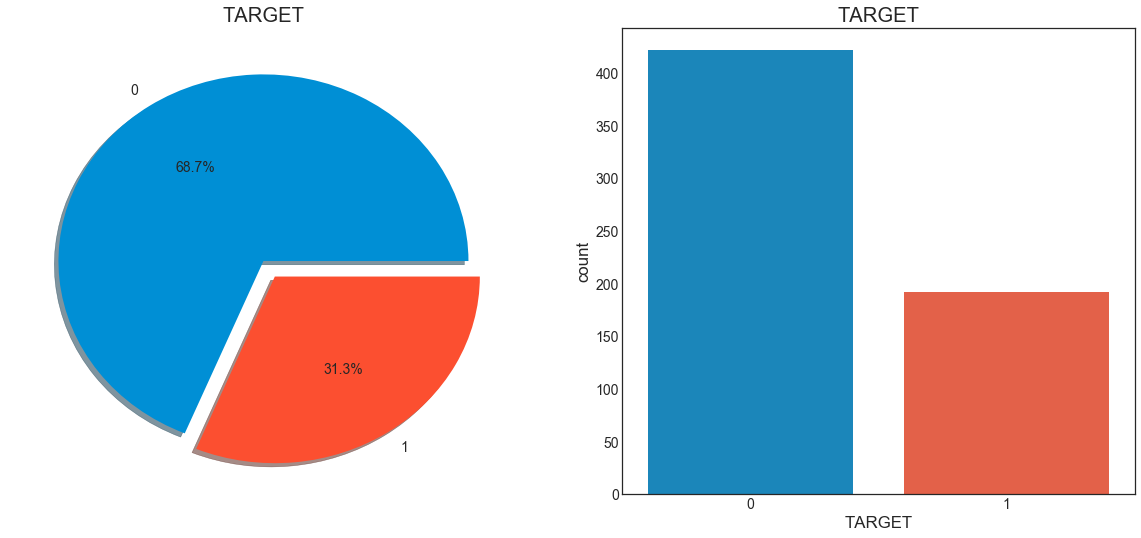

In [20]:
#Visualize the target variable
f,ax=plt.subplots(1,2)
df['TARGET'].value_counts().plot.pie(explode=[0,0.1],autopct='%1.1f%%',ax=ax[0],shadow=True)
ax[0].set_title('TARGET')
ax[0].set_ylabel('')
sns.countplot('TARGET',data=df,ax=ax[1])
ax[1].set_title('TARGET')
plt.show()

It is evident that many customers are good and paying their loan. 

We need to dig down more to get better insights from the data and see which categories of customers are performing and who aren't.

### Exploratory Data Analysis 

In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 14 columns):
Loan_ID              614 non-null object
Gender               614 non-null object
Married              614 non-null object
Dependents           614 non-null object
Education            614 non-null object
Self_Employed        614 non-null object
ApplicantIncome      614 non-null int64
CoapplicantIncome    614 non-null float64
LoanAmount           614 non-null float64
Loan_Amount_Term     614 non-null float64
Credit_History       614 non-null float64
Property_Area        614 non-null object
Loan_Status          614 non-null object
TARGET               614 non-null int32
dtypes: float64(4), int32(1), int64(1), object(8)
memory usage: 64.8+ KB


We have 
- **8** categorical variable;
- **5** numerical variables
- **1** binary dependent variable 

##### Analysis of Numerical Variables

In [22]:
df.describe()

ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amount_Term  \
count           614.00             614.00      614.00            614.00   
mean          5,403.46           1,621.25      141.17            334.20   
std           6,109.04           2,926.25       88.34             82.18   
min             150.00               0.00        0.00              0.00   
25%           2,877.50               0.00       98.00            360.00   
50%           3,812.50           1,188.50      125.00            360.00   
75%           5,795.00           2,297.25      164.75            360.00   
max          81,000.00          41,667.00      700.00            480.00   

       Credit_History  TARGET  
count          614.00  614.00  
mean             0.77    0.31  
std              0.42    0.46  
min              0.00    0.00  
25%              1.00    0.00  
50%              1.00    0.00  
75%              1.00    1.00  
max              1.00    1.00

---

### Univariate Analysis

In [23]:
print('Highest ApplicantIncome Amount is: KES',df['ApplicantIncome'].max())
print('Lowest ApplicantIncome Amount is: KES',df['ApplicantIncome'].min())
print('Average ApplicantIncome Amount is: KES',df['ApplicantIncome'].mean())

Highest ApplicantIncome Amount is: KES 81000
Lowest ApplicantIncome Amount is: KES 150
Average ApplicantIncome Amount is: KES 5403.459283387622


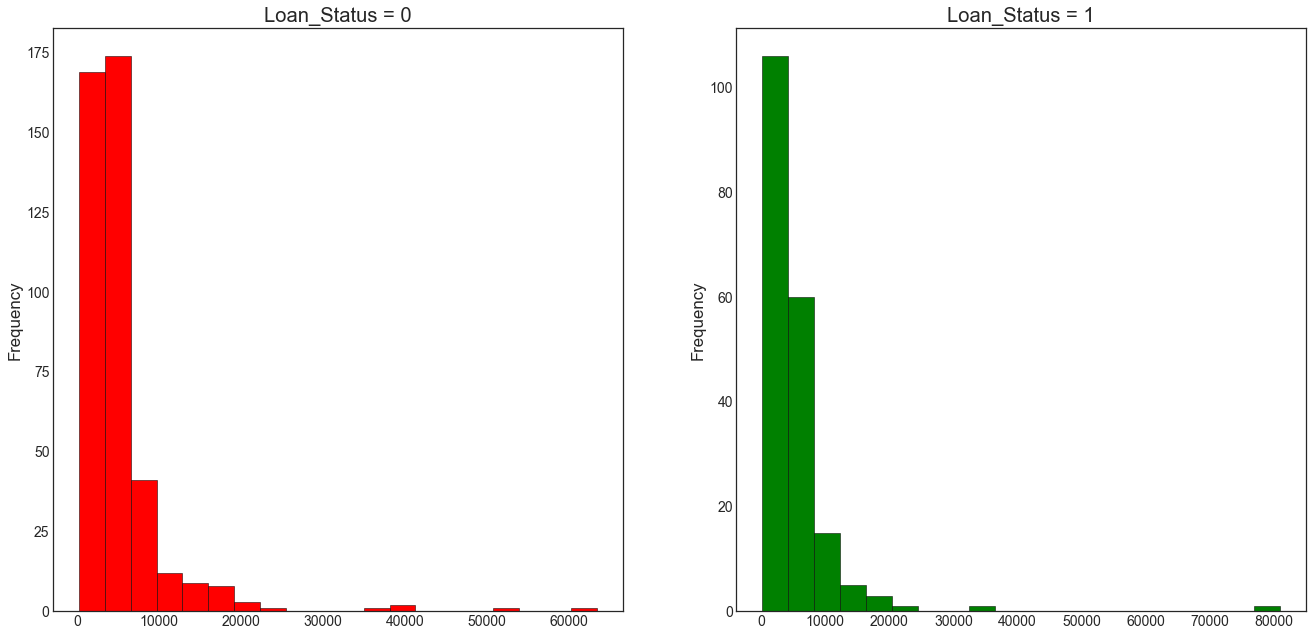

In [24]:
#Total price against loan status
f,ax=plt.subplots(1,2,figsize=(20,10))
df[df['TARGET']==0].ApplicantIncome.plot.hist(ax=ax[0],bins=20,edgecolor='black',color='red')
ax[0].set_title('Loan_Status = 0')
df[df['TARGET']==1].ApplicantIncome.plot.hist(ax=ax[1],color='green',bins=20,edgecolor='black')
ax[1].set_title('Loan_Status = 1')
plt.show()

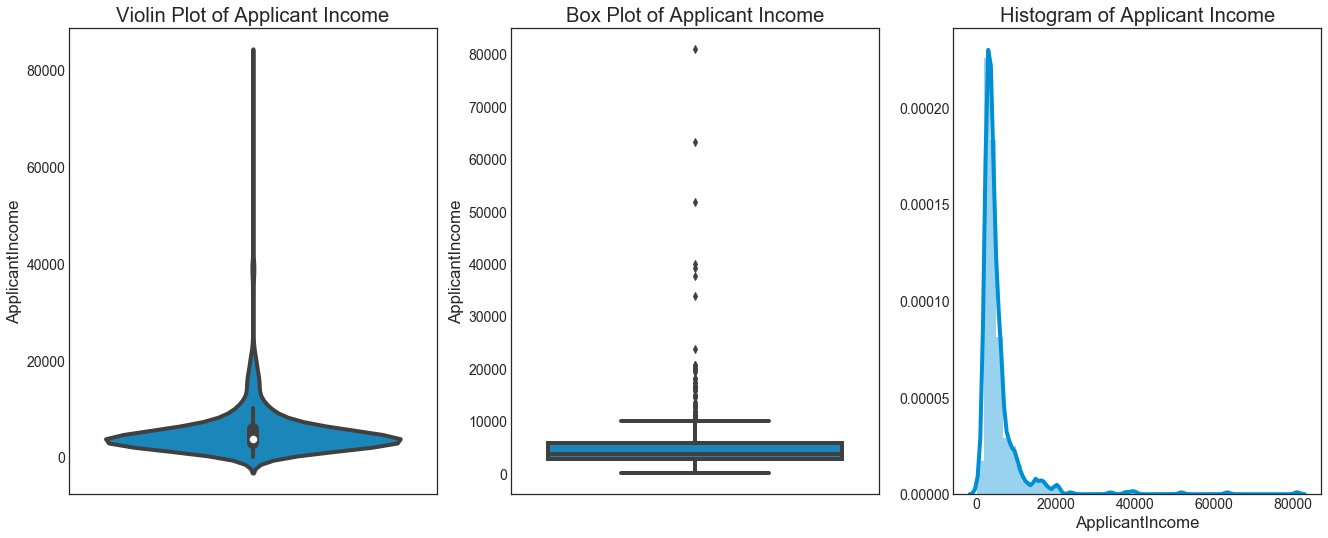

In [25]:
f,ax=plt.subplots(1,3,figsize=(20,8))
sns.violinplot(y="ApplicantIncome", data=df,split=True,ax=ax[0])
ax[0].set_title('Violin Plot of Applicant Income')
sns.boxplot(data=df,y="ApplicantIncome",ax=ax[1])
ax[1].set_title('Box Plot of Applicant Income')
sns.distplot(df['ApplicantIncome'],ax=ax[2])
ax[2].set_title('Histogram of Applicant Income')
plt.show()

In [26]:
#check ouliers and plot again
# Calculate first and third quartile
first_quartile = df['ApplicantIncome'].describe()['25%']
third_quartile = df['ApplicantIncome'].describe()['75%']

#Interquartile range
iqr = third_quartile - first_quartile

#Remove outliers
df_without_outliers = df[(df['ApplicantIncome'] > (first_quartile - 3 * iqr)) &
            (df['ApplicantIncome'] < (third_quartile + 3 * iqr))]

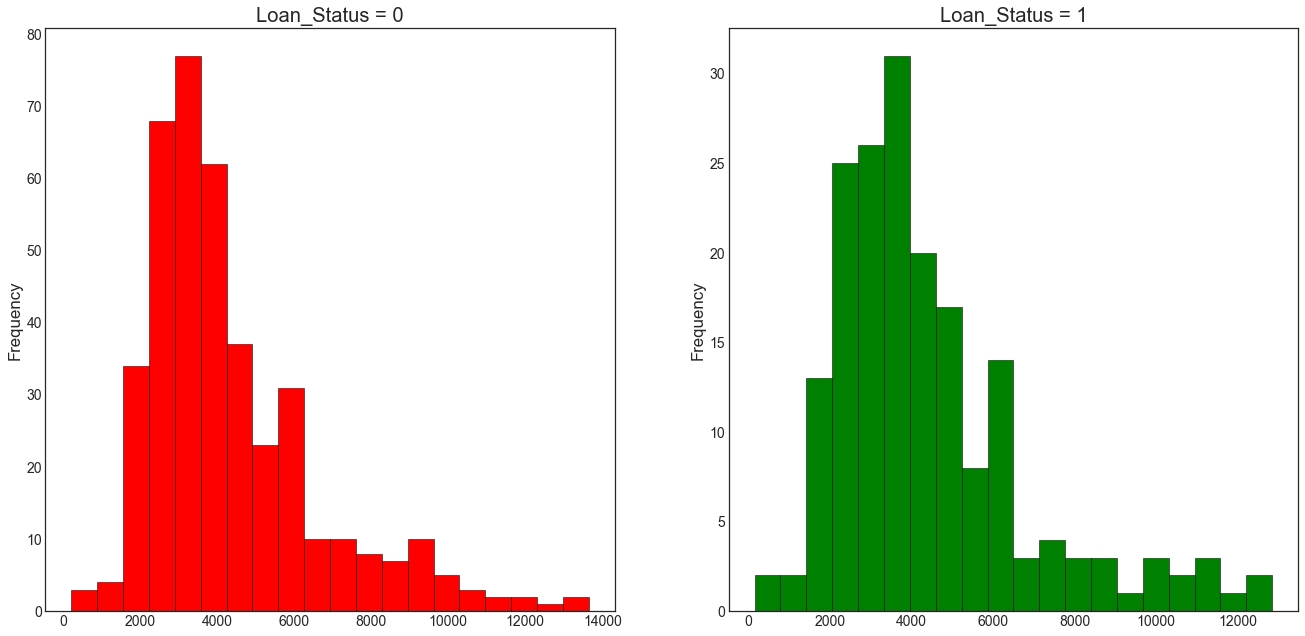

In [27]:
#Total price against loan status
f,ax=plt.subplots(1,2,figsize=(20,10))
df_without_outliers[df_without_outliers['TARGET']==0].ApplicantIncome.plot.hist(ax=ax[0],bins=20,edgecolor='black',color='red')
ax[0].set_title('Loan_Status = 0')
df_without_outliers[df_without_outliers['TARGET']==1].ApplicantIncome.plot.hist(ax=ax[1],color='green',bins=20,edgecolor='black')
ax[1].set_title('Loan_Status = 1')
plt.show()

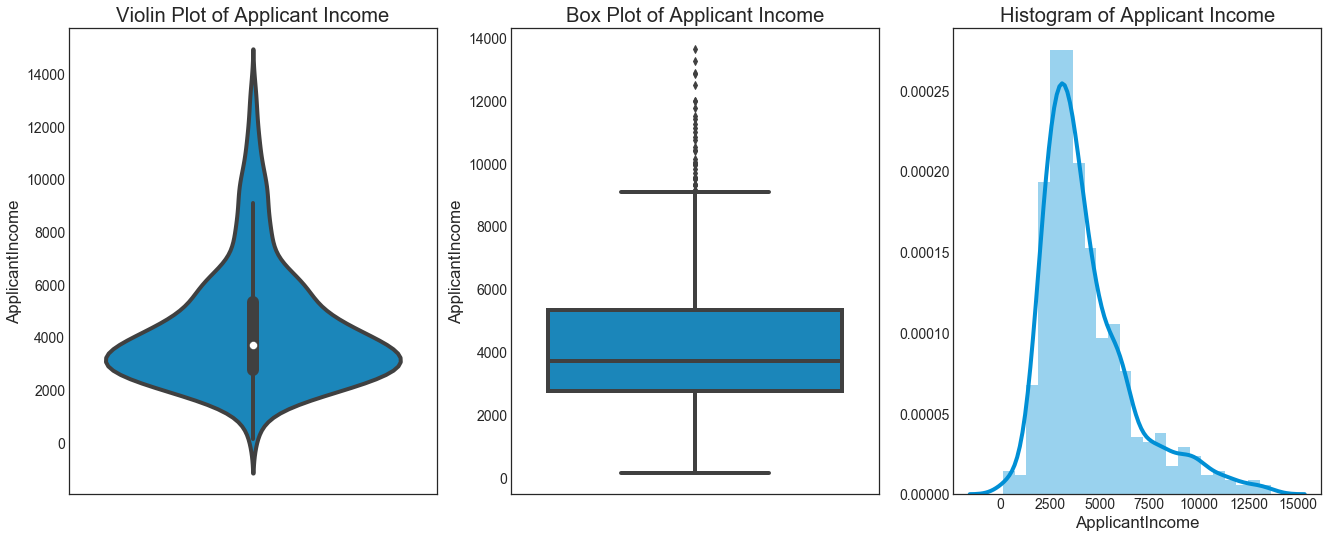

In [28]:
f,ax=plt.subplots(1,3,figsize=(20,8))
sns.violinplot(y="ApplicantIncome", data=df_without_outliers,split=True,ax=ax[0])
ax[0].set_title('Violin Plot of Applicant Income')
sns.boxplot(data=df_without_outliers,y="ApplicantIncome",ax=ax[1])
ax[1].set_title('Box Plot of Applicant Income')
sns.distplot(df_without_outliers['ApplicantIncome'],ax=ax[2])
ax[2].set_title('Histogram of Applicant Income')
plt.show()

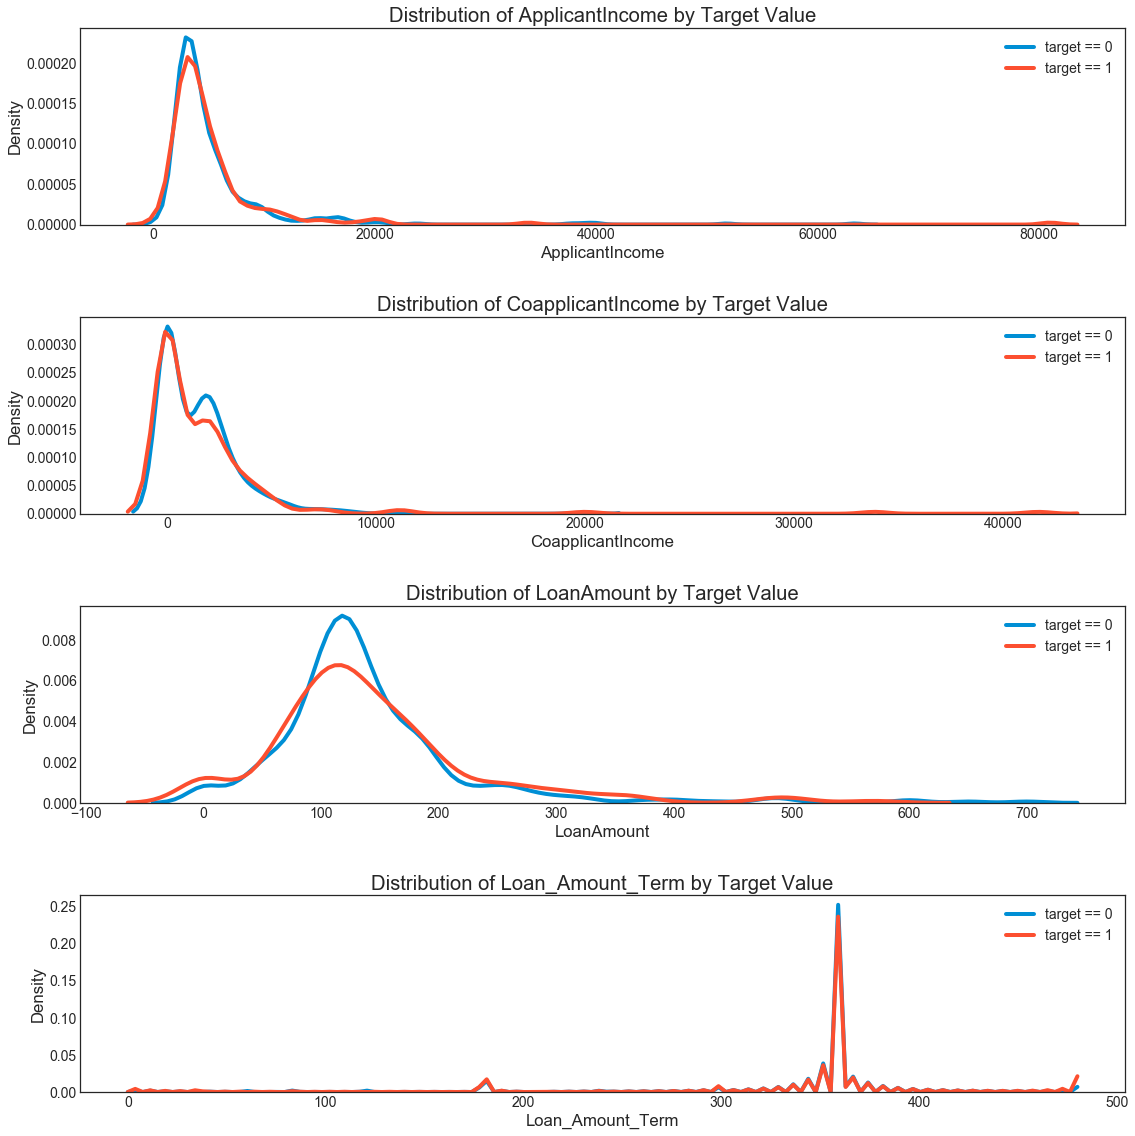

In [29]:
plt.figure(figsize = (16, 16))

# iterate through the sources
for i, source in enumerate(['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount','Loan_Amount_Term']):
    
    # create a new subplot for each source
    plt.subplot(4, 1, i + 1)
    # plot repaid loans
    sns.kdeplot(df.loc[df['TARGET'] == 0, source], label = 'target == 0')
    # plot loans that were not repaid
    sns.kdeplot(df.loc[df['TARGET'] == 1, source], label = 'target == 1')
    
    # Label the plots
    plt.title('Distribution of %s by Target Value' % source)
    plt.xlabel('%s' % source); plt.ylabel('Density');
    
plt.tight_layout(h_pad = 2.5)

### Multivariate Analysis

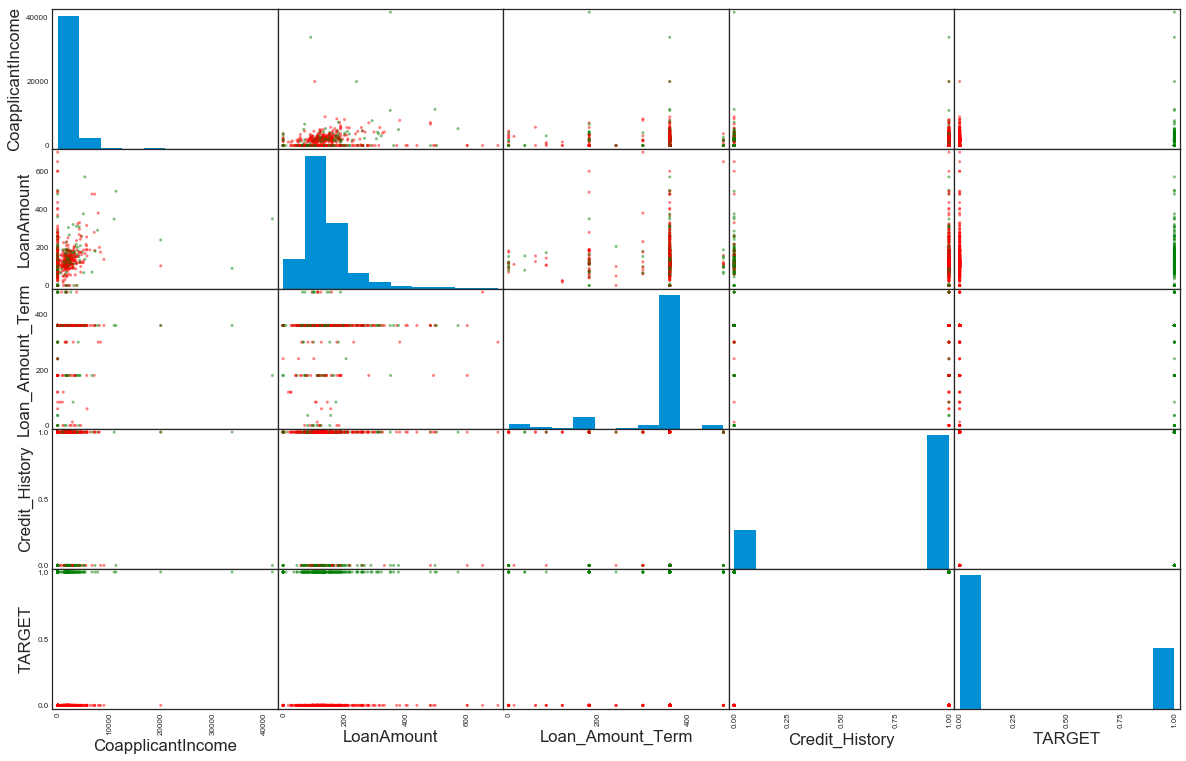

In [30]:
from pandas.tools.plotting import scatter_matrix

colors = ['green' if x else 'red' for x in df['TARGET']]
numeric_cols = list(df.dtypes[(df.dtypes=='float') | (df.dtypes=='int')].index.values)
scatter_matrix(df[numeric_cols], figsize=(18, 12), diagonal='hist', color=colors)
plt.show();

Scatter plot shows the relationship between two variable but does not indicates the strength of relationship amongst them. To find the strength of the relationship, we use Correlation. Correlation varies between -1 and +1.

**Correlation**
-  -1: perfect negative linear correlation
-  +1:perfect positive linear correlation and 
-  0: No correlation

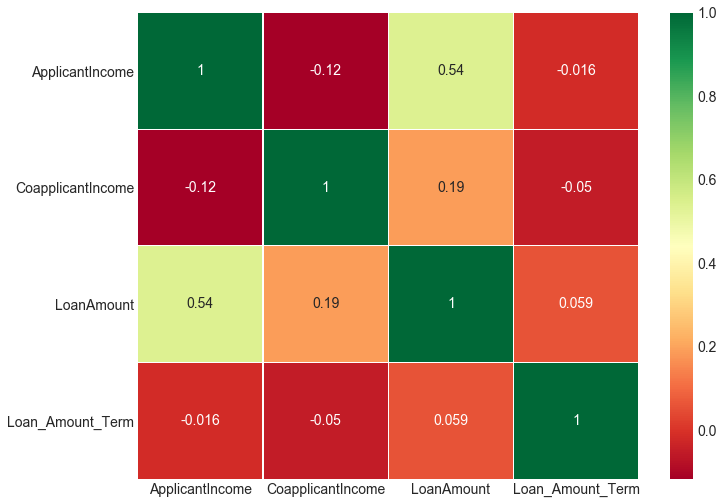

In [31]:
df_num = df[["ApplicantIncome","CoapplicantIncome","LoanAmount","Loan_Amount_Term"]]

#loan_num.corr()-->correlation matrix
sns.heatmap(df_num.corr(),annot=True,cmap='RdYlGn',linewidths=0.2) 
fig=plt.gcf()
fig.set_size_inches(10,8)
plt.show()


**POSITIVE CORRELATION:** If an **increase in feature A leads to increase in feature B, then they are positively correlated**. A value **1 means perfect positive correlation**.

**NEGATIVE CORRELATION:** If an **increase in feature A leads to decrease in feature B, then they are negatively correlated**. A value **-1 means perfect negative correlation**.

##### Analysis of Categorical Variables

###### Gender - The Gender type of the  customer

In [32]:
df.groupby(['Gender','TARGET'])['TARGET'].count()

Gender  TARGET
0       0           8
        1           5
Female  0          75
        1          37
Male    0         339
        1         150
Name: TARGET, dtype: int64

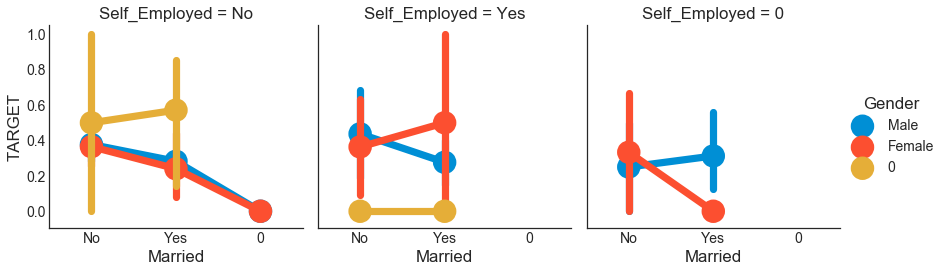

In [33]:
sns.factorplot('Married','TARGET',hue='Gender',col='Self_Employed',data=df)
plt.show()

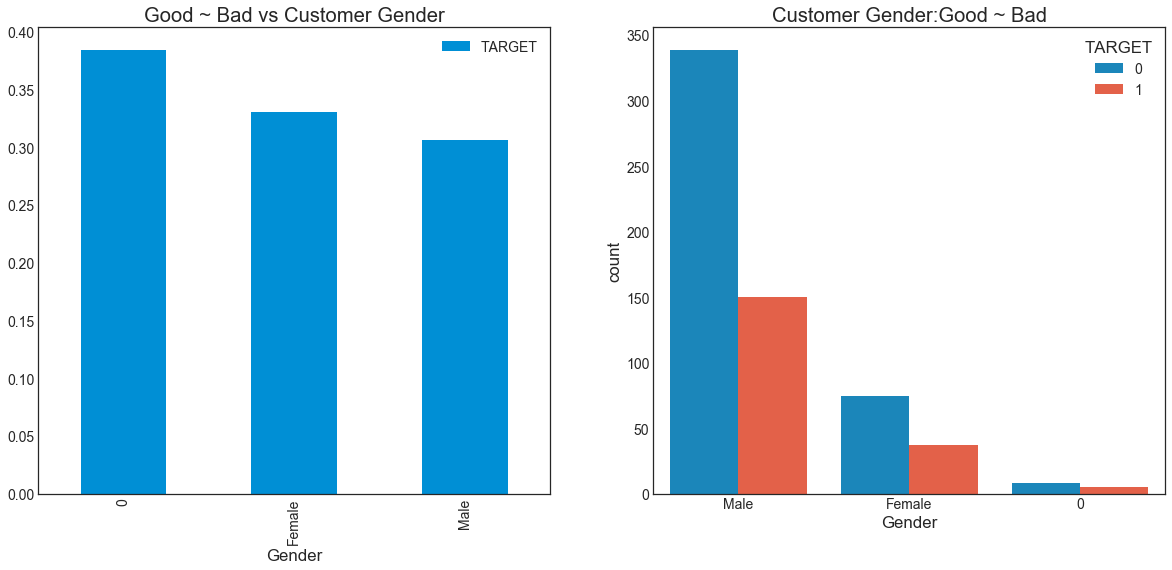

In [34]:
f,ax=plt.subplots(1,2,figsize=(18,8))
df[['Gender','TARGET']].groupby(['Gender']).mean().plot.bar(ax=ax[0])
ax[0].set_title('Good ~ Bad vs Customer Gender')
sns.countplot('Gender',hue='TARGET',data=df,ax=ax[1])
ax[1].set_title('Customer Gender:Good ~ Bad')
plt.show()

In [35]:
pd.crosstab([df.Gender,df.TARGET],df.Married ,margins=True).style.background_gradient(cmap='summer_r')

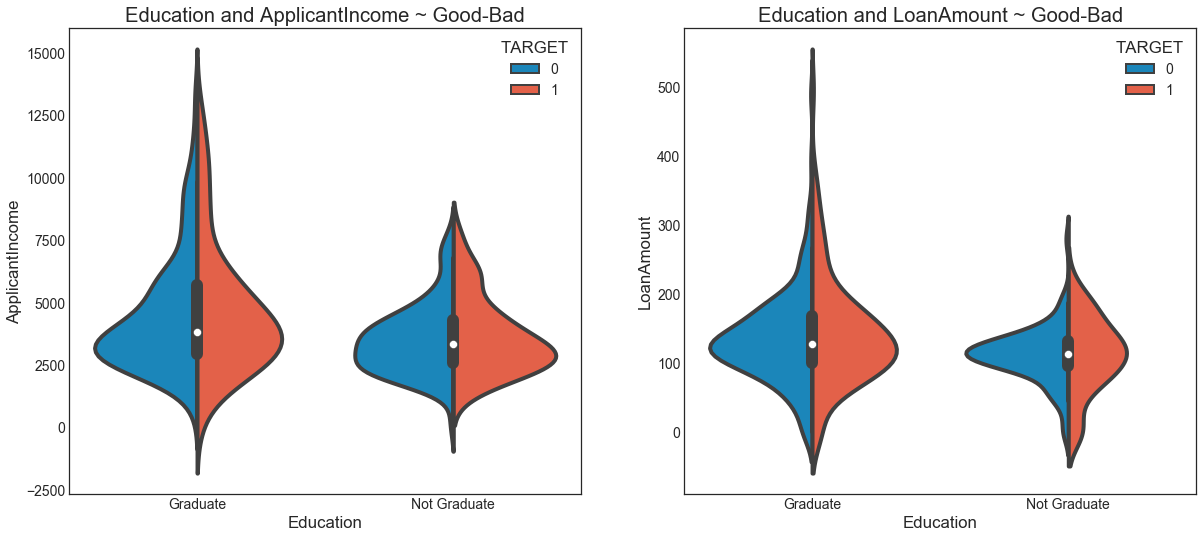

In [36]:
#mix categorical and continous
f,ax=plt.subplots(1,2,figsize=(18,8))
sns.violinplot("Education","ApplicantIncome", hue="TARGET", data=df_without_outliers,split=True,ax=ax[0])
ax[0].set_title('Education and ApplicantIncome ~ Good-Bad')
sns.violinplot("Education","LoanAmount", hue="TARGET", data=df_without_outliers,split=True,ax=ax[1])
ax[1].set_title('Education and LoanAmount ~ Good-Bad')
plt.show()

---

### Feature Engineering

Now what is Feature Engineering?

Whenever we are given a dataset with features, it is not necessary that all the features will be important. There maybe be many redundant features which should be eliminated. Also we can get or add new features by observing or extracting information from other features.

 Lets see if we can get any new features and eliminate a few. Also we will tranform the existing relevant features to suitable form for Predictive Modeling.

##### Problem With ApplicantIncome Feature:

As I have mentioned earlier that **ApplicantIncome is a continous feature**, there is a problem with Continous Variables in Machine Learning Models.

**Eg:**If I say to group or arrange Sports Person by **Sex**, We can easily segregate them by Male and Female.

Now if I say to group them by their **ApplicantIncome**, then how would you do it? If there are 30 Persons, there may be 30 ApplicantIncome values. Now this is problematic.

We need to convert these **continous values into categorical values** by either Binning or Normalisation. I will be using binning i.e group a range of ApplicantIncome into a single bin or assign them a single value.

Okay so the maximum ApplicantIncome of a customer was 81000. So lets divide the range from 150-81000 into 5 bins. So 81000/5=20250.
So bins of size 15.

In [37]:
df['ApplicantIncome_band']=0
df.loc[df['ApplicantIncome']<=20250,'ApplicantIncome_band']=0
df.loc[(df['ApplicantIncome']>20250)&(df['ApplicantIncome']<=40500),'ApplicantIncome_band']=1
df.loc[(df['ApplicantIncome']>40500)&(df['ApplicantIncome']<=60750),'ApplicantIncome_band']=2
df.loc[(df['ApplicantIncome']>60750)&(df['ApplicantIncome']<=81000),'ApplicantIncome_band']=3
df.loc[df['ApplicantIncome']>81000,'ApplicantIncome_band']=4
df.head(2)

Loan_ID Gender Married Dependents Education Self_Employed  \
0  LP001002   Male      No          0  Graduate            No   
1  LP001003   Male     Yes          1  Graduate            No   

   ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amount_Term  \
0             5849               0.00        0.00            360.00   
1             4583           1,508.00      128.00            360.00   

   Credit_History Property_Area Loan_Status  TARGET  ApplicantIncome_band  
0            1.00         Urban           Y       0                     0  
1            1.00         Rural           N       1                     0

In [38]:
#checking the number of customers in each band
df['ApplicantIncome_band'].value_counts().to_frame().style.background_gradient(cmap='summer')

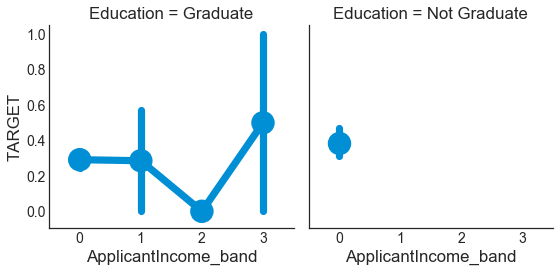

In [39]:
sns.factorplot('ApplicantIncome_band','TARGET',data=df,col='Education')
plt.show()

True that..the longest ApplicantIncome seem to be safe irrespective of education status.

######  CoapplicantIncome

Since CoapplicantIncome is also a continous feature, we need to convert it into ordinal value. For this we will use **pandas.qcut**.

So what **qcut** does is it splits or arranges the values according the number of bins we have passed. So if we pass for 5 bins, it will arrange the values equally spaced into 5 seperate bins or value ranges.

In [40]:
df['LoanAmount_Range']=pd.qcut(df['LoanAmount'],5)
df.groupby(['LoanAmount_Range'])['TARGET'].mean().to_frame().style.background_gradient(cmap='summer_r')

Now we cannot pass the LoanAmount_Range values as it is. We should convert it into singleton values same as we did in **ApplicantIncome**

In [41]:
df['LoanAmount__cat']=0
df.loc[df['LoanAmount']<=90.0,'LoanAmount__cat']=0
df.loc[(df['LoanAmount']>90.0)&(df['LoanAmount']<=113.0),'LoanAmount__cat']=1
df.loc[(df['LoanAmount']>113.0)&(df['LoanAmount']<=136.0),'LoanAmount__cat']=2
df.loc[(df['LoanAmount']>136.0)&(df['LoanAmount']<=180.0),'LoanAmount__cat']=3
df.loc[(df['LoanAmount']>180.0)&(df['LoanAmount']<=700.0),'LoanAmount__cat']=4

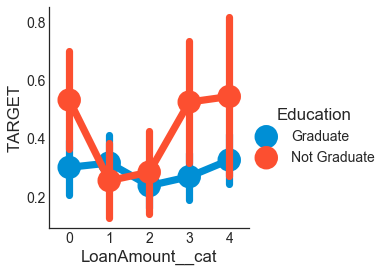

In [42]:
sns.factorplot('LoanAmount__cat','TARGET',data=df,hue='Education')
plt.show()

**<font color=red> Converting String Values into Numeric : Since we cannot pass strings to a machine learning model, we need to convert categorical features into numeric values.**

In [43]:
df.head(2)

Loan_ID Gender Married Dependents Education Self_Employed  \
0  LP001002   Male      No          0  Graduate            No   
1  LP001003   Male     Yes          1  Graduate            No   

   ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amount_Term  \
0             5849               0.00        0.00            360.00   
1             4583           1,508.00      128.00            360.00   

   Credit_History Property_Area Loan_Status  TARGET  ApplicantIncome_band  \
0            1.00         Urban           Y       0                     0   
1            1.00         Rural           N       1                     0   

  LoanAmount_Range  LoanAmount__cat  
0   (-0.001, 90.0]                0  
1   (113.0, 136.0]                2

#### Dropping UnNeeded Features
**ApplicantIncome**--> We have the ApplicantIncome_band feature, so no need of this

**LoanAmount**--> We have the LoanAmount__cat feature, so no need of this.

**Loan_ID**--> Cannot be categorised

**Loan_Status**--> Has been changed to TARGET

##### Converting String Values into Numeric
Since we cannot pass strings to a ML model, we need to convert features lIke Product, Gender, Location, Reion into numeric values.

In [44]:
sub_df = df[['Gender','Married','Dependents','Education','Self_Employed','ApplicantIncome_band',
             'CoapplicantIncome','Loan_Amount_Term','Credit_History','Property_Area','LoanAmount__cat','TARGET']]

In [45]:
sub_df.head(2)

Gender Married Dependents Education Self_Employed  ApplicantIncome_band  \
0   Male      No          0  Graduate            No                     0   
1   Male     Yes          1  Graduate            No                     0   

   CoapplicantIncome  Loan_Amount_Term  Credit_History Property_Area  \
0               0.00            360.00            1.00         Urban   
1           1,508.00            360.00            1.00         Rural   

   LoanAmount__cat  TARGET  
0                0       0  
1                2       1

### Encoding Categorical Variables

We need to deal with pesky categorical variables.  A machine learning model unfortunately cannot deal with categorical variables (except for some models such as [LightGBM](http://lightgbm.readthedocs.io/en/latest/Features.html)). Therefore, we have to find a way to encode (represent) these variables as numbers before handing them off to the model. There are two main ways to carry out this process:

* Label encoding: assign each unique category in a categorical variable with an integer. No new columns are created. An example is shown below

![image](fig/label_encoding.png)

* One-hot encoding: create a new column for each unique category in a categorical variable. Each observation recieves a 1 in the column for its corresponding category and a 0 in all other new columns. 

![image](fig/one_hot_encoding.png)

The problem with label encoding is that it gives the categories an arbitrary ordering. The value assigned to each of the categories is random and does not reflect any inherent aspect of the category. In the example above, programmer recieves a 4 and data scientist a 1, but if we did the same process again, the labels could be reversed or completely different. The actual assignment of the integers is arbitrary. Therefore, when we perform label encoding, the model might use the relative value of the feature (for example programmer = 4 and data scientist = 1) to assign weights which is not what we want. If we only have two unique values for a categorical variable (such as Male/Female), then label encoding is fine, but for more than 2 unique categories, one-hot encoding is the safe option.

There is some debate about the relative merits of these approaches, and some models can deal with label encoded categorical variables with no issues. [Here is a good Stack Overflow discussion](https://datascience.stackexchange.com/questions/9443/when-to-use-one-hot-encoding-vs-labelencoder-vs-dictvectorizor). I think (and this is just a personal opinion) for categorical variables with many classes, one-hot encoding is the safest approach because it does not impose arbitrary values to categories. The only downside to one-hot encoding is that the number of features (dimensions of the data) can explode with categorical variables with many categories. To deal with this, we can perform one-hot encoding followed by [PCA](http://www.cs.otago.ac.nz/cosc453/student_tutorials/principal_components.pdf) or other [dimensionality reduction methods](https://www.analyticsvidhya.com/blog/2015/07/dimension-reduction-methods/) to reduce the number of dimensions (while still trying to preserve information). 

we will use  One-Hot Encoding for any categorical variables. 

In [46]:
sub_df.head(2)

Gender Married Dependents Education Self_Employed  ApplicantIncome_band  \
0   Male      No          0  Graduate            No                     0   
1   Male     Yes          1  Graduate            No                     0   

   CoapplicantIncome  Loan_Amount_Term  Credit_History Property_Area  \
0               0.00            360.00            1.00         Urban   
1           1,508.00            360.00            1.00         Rural   

   LoanAmount__cat  TARGET  
0                0       0  
1                2       1

In [47]:
# Encoding categorical variables
# create three dummy variables using get_dummies, then exclude the first dummy column
def dummify(col_name, df):
    df_dummies = pd.get_dummies(df[col_name], prefix=col_name).iloc[:, 1:] 
    return df_dummies 
 
#call the function
dummy_cols = ['Gender','Dependents', 'Married', 'Education', 'Self_Employed','Property_Area']
for col_name in dummy_cols:
    dummies = dummify(col_name, sub_df)
    sub_df = pd.concat([sub_df, dummies], axis=1) # join the dummy columns to the original df
    sub_df = sub_df.drop([col_name], axis=1) # drop the original cat. vars column

In [48]:
sub_df.head(2)

ApplicantIncome_band  CoapplicantIncome  Loan_Amount_Term  Credit_History  \
0                     0               0.00            360.00            1.00   
1                     0           1,508.00            360.00            1.00   

   LoanAmount__cat  TARGET  Gender_Female  Gender_Male  Dependents_0  \
0                0       0              0            1             1   
1                2       1              0            1             0   

   Dependents_1  Dependents_2  Dependents_3+  Married_No  Married_Yes  \
0             0             0              0           1            0   
1             1             0              0           0            1   

   Education_Not Graduate  Self_Employed_No  Self_Employed_Yes  \
0                       0                 1                  0   
1                       0                 1                  0   

   Property_Area_Semiurban  Property_Area_Urban  
0                        0                    1  
1                        0                    0

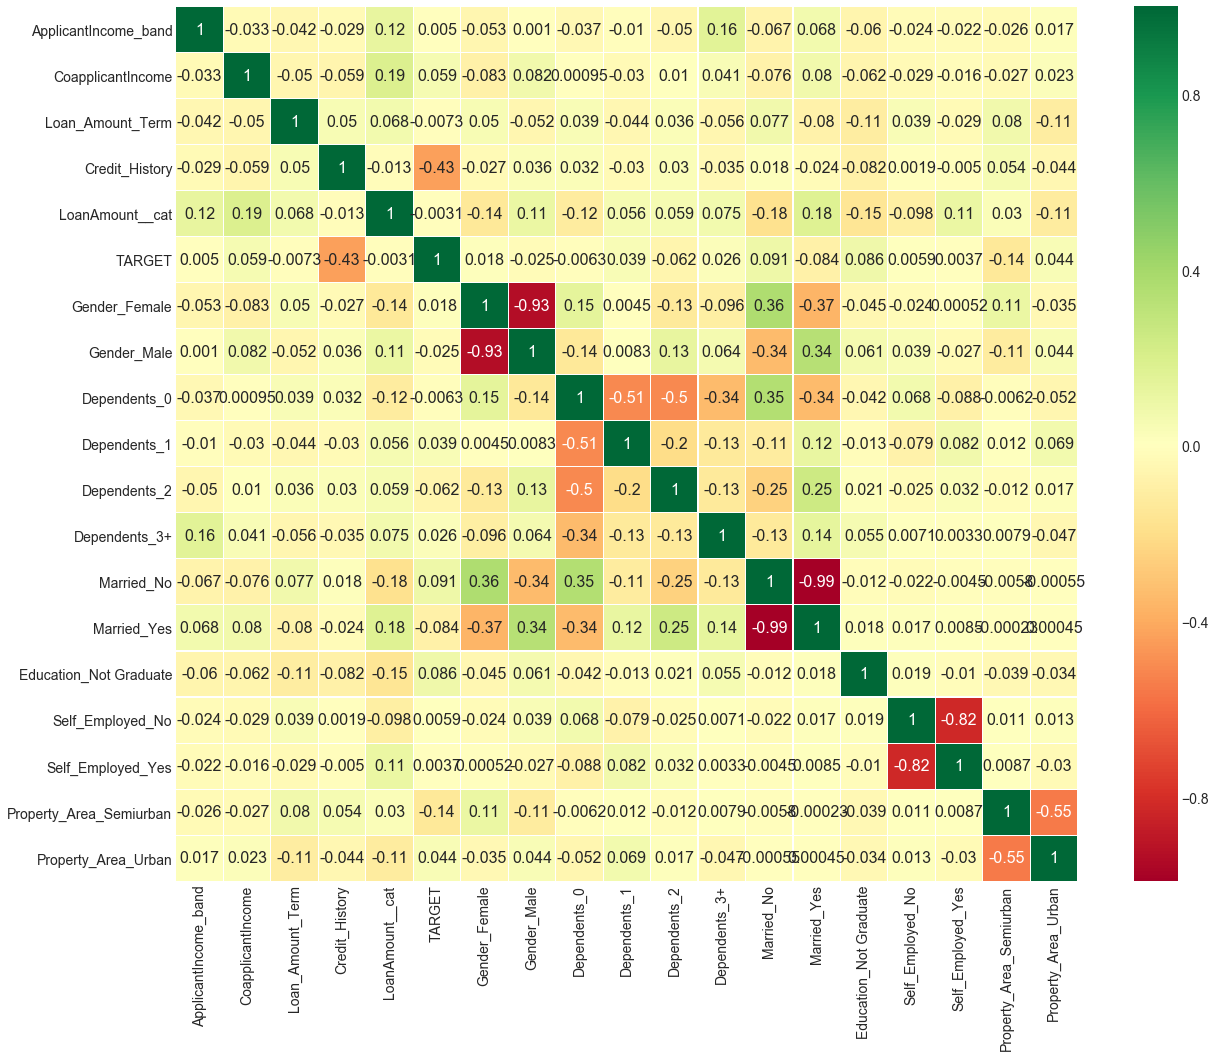

In [49]:
#Correlation on features
sns.heatmap(sub_df.corr(),annot=True,cmap='RdYlGn',linewidths=0.1,annot_kws={'size':16})
fig=plt.gcf()
fig.set_size_inches(18,15)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.show()

---

### Model Selection and Development

We have gained some insights from the data exploration. But with that, we cannot accurately predict or tell whether a customer will default or not. So now we will predict  whether the customer will default or not. There are various classification algorithms :Logistic Regression,Support Vector Machines(Linear and radial),)Random Forest,K-Nearest Neighbours,Naive Bayes,Decision Tree.

1)Logistic Regression

2)Support Vector Machines(Linear and radial)

3)Random Forest

4)K-Nearest Neighbours

5)Naive Bayes

6)Decision Tree

7)Logistic Regression

In [50]:
#importing all the required ML packages
from sklearn.linear_model import LogisticRegression  #logistic regression
from sklearn import svm                              #support vector Machine
from sklearn.ensemble import RandomForestClassifier  #Random Forest
from sklearn.neighbors import KNeighborsClassifier   #KNN
from sklearn.naive_bayes import GaussianNB           #Naive bayes
from sklearn.tree import DecisionTreeClassifier      #Decision Tree

#importing packages for evaluation
from sklearn.model_selection import train_test_split #training and testing data split
from sklearn import metrics                          #accuracy measure
from sklearn.metrics import confusion_matrix         #for confusion matrix

In [51]:
sub_df.columns

Index(['ApplicantIncome_band', 'CoapplicantIncome', 'Loan_Amount_Term',
       'Credit_History', 'LoanAmount__cat', 'TARGET', 'Gender_Female',
       'Gender_Male', 'Dependents_0', 'Dependents_1', 'Dependents_2',
       'Dependents_3+', 'Married_No', 'Married_Yes', 'Education_Not Graduate',
       'Self_Employed_No', 'Self_Employed_Yes', 'Property_Area_Semiurban',
       'Property_Area_Urban'],
      dtype='object')

In [52]:
#rearrange the columns
sub_df = sub_df[['TARGET','Dependents_1','Dependents_2', 'ApplicantIncome_band', 'CoapplicantIncome','Loan_Amount_Term', 'Credit_History', 
                 'LoanAmount__cat','Gender_Male', 'Married_Yes', 'Education_Not Graduate','Self_Employed_Yes', 'Property_Area_Semiurban', 
                 'Property_Area_Urban']]

sub_df.head(3)

TARGET  Dependents_1  Dependents_2  ApplicantIncome_band  \
0       0             0             0                     0   
1       1             1             0                     0   
2       0             0             0                     0   

   CoapplicantIncome  Loan_Amount_Term  Credit_History  LoanAmount__cat  \
0               0.00            360.00            1.00                0   
1           1,508.00            360.00            1.00                2   
2               0.00            360.00            1.00                0   

   Gender_Male  Married_Yes  Education_Not Graduate  Self_Employed_Yes  \
0            1            0                       0                  0   
1            1            1                       0                  0   
2            1            1                       0                  1   

   Property_Area_Semiurban  Property_Area_Urban  
0                        0                    1  
1                        0                    0  
2                        0                    1

In [53]:
#partition the data
train,test=train_test_split(sub_df,test_size=0.3,random_state=0,stratify=sub_df['TARGET'])
train_X=train[train.columns[1:]]
train_Y=train[train.columns[:1]]
test_X=test[test.columns[1:]]
test_Y=test[test.columns[:1]]
X=sub_df[sub_df.columns[1:]]
Y=sub_df['TARGET']

In [54]:
train_X.head(3)

Dependents_1  Dependents_2  ApplicantIncome_band  CoapplicantIncome  \
317             0             0                     0           2,134.00   
17              0             0                     0               0.00   
581             0             0                     0          33,837.00   

     Loan_Amount_Term  Credit_History  LoanAmount__cat  Gender_Male  \
317            360.00            0.00                0            1   
17             360.00            0.00                0            0   
581            360.00            1.00                0            1   

     Married_Yes  Education_Not Graduate  Self_Employed_Yes  \
317            1                       0                  0   
17             0                       0                  0   
581            0                       0                  0   

     Property_Area_Semiurban  Property_Area_Urban  
317                        0                    1  
17                         0                    1  
581                        0                    1

In [55]:
X.head(3)

Dependents_1  Dependents_2  ApplicantIncome_band  CoapplicantIncome  \
0             0             0                     0               0.00   
1             1             0                     0           1,508.00   
2             0             0                     0               0.00   

   Loan_Amount_Term  Credit_History  LoanAmount__cat  Gender_Male  \
0            360.00            1.00                0            1   
1            360.00            1.00                2            1   
2            360.00            1.00                0            1   

   Married_Yes  Education_Not Graduate  Self_Employed_Yes  \
0            0                       0                  0   
1            1                       0                  0   
2            1                       0                  1   

   Property_Area_Semiurban  Property_Area_Urban  
0                        0                    1  
1                        0                    0  
2                        0                    1

#### Radial Support Vector Machines(rbf-SVM)

In [56]:
model=svm.SVC(kernel='rbf',C=1,gamma=0.1)
model.fit(train_X,train_Y)
prediction1=model.predict(test_X)
print('Accuracy for rbf SVM is ',metrics.accuracy_score(prediction1,test_Y))

Accuracy for rbf SVM is  0.7351351351351352


#### Linear Support Vector Machine(linear-SVM)

In [57]:
model=svm.SVC(kernel='linear',C=0.1,gamma=0.1)
model.fit(train_X,train_Y)
prediction2=model.predict(test_X)
print('Accuracy for linear SVM is',metrics.accuracy_score(prediction2,test_Y))

Accuracy for linear SVM is 0.7297297297297297


#### Logistic Regression

In [58]:
model = LogisticRegression()
model.fit(train_X,train_Y)
prediction3=model.predict(test_X)
print('The accuracy of the Logistic Regression is',metrics.accuracy_score(prediction3,test_Y))

The accuracy of the Logistic Regression is 0.7189189189189189


#### Decision Tree

In [59]:
model=DecisionTreeClassifier()
model.fit(train_X,train_Y)
prediction4=model.predict(test_X)
print('The accuracy of the Decision Tree is',metrics.accuracy_score(prediction4,test_Y))

The accuracy of the Decision Tree is 0.6702702702702703


#### K-Nearest Neighbours(KNN)

In [60]:
model=KNeighborsClassifier() 
model.fit(train_X,train_Y)
prediction5=model.predict(test_X)
print('The accuracy of the KNN is',metrics.accuracy_score(prediction5,test_Y))

The accuracy of the KNN is 0.6378378378378379


Now the accuracy for the KNN model changes as we change the values for **n_neighbours** attribute. The default value is **5**. Lets check the accuracies over various values of n_neighbours.

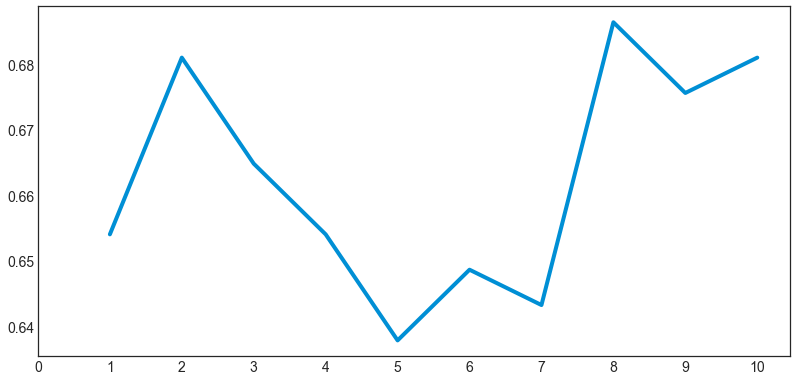

Accuracies for different values of n are: [0.65405405 0.68108108 0.66486486 0.65405405 0.63783784 0.64864865
 0.64324324 0.68648649 0.67567568 0.68108108] with the max value as  0.6864864864864865


In [62]:
a_index=list(range(1,11))
a=pd.Series()
x=[0,1,2,3,4,5,6,7,8,9,10]
for i in list(range(1,11)):
    model=KNeighborsClassifier(n_neighbors=i) 
    model.fit(train_X,train_Y)
    prediction=model.predict(test_X)
    a=a.append(pd.Series(metrics.accuracy_score(prediction,test_Y)))
plt.plot(a_index, a)
plt.xticks(x)
fig=plt.gcf()
fig.set_size_inches(12,6)
plt.show()
print('Accuracies for different values of n are:',a.values,'with the max value as ',a.values.max())

#### Gaussian Naive Bayes

In [63]:
model=GaussianNB()
model.fit(train_X,train_Y)
prediction6=model.predict(test_X)
print('The accuracy of the NaiveBayes is',metrics.accuracy_score(prediction6,test_Y))

The accuracy of the NaiveBayes is 0.6972972972972973


#### Random Forests

In [64]:
model=RandomForestClassifier(n_estimators=100)
model.fit(train_X,train_Y)
prediction7=model.predict(test_X)
print('The accuracy of the Random Forests is',metrics.accuracy_score(prediction7,test_Y))

The accuracy of the Random Forests is 0.6864864864864865


### "No Free Lunch" :(
D. H. Wolpert. The supervised learning no-free-lunch theorems. In Soft Computing and Industry, pages 25–42. Springer, 2002.

![image](fig/nofreelunch.png)

Roughly speaking:

**“No one model works best for all possible situations.”**

The accuracy of a model is not the only factor that determines the robustness of the classifier. Let's say that a classifier is trained over a training data and tested over the test data and it scores an accuracy of 90%.

Now this seems to be very good accuracy for a classifier, but can we confirm that it will be 90% for all the new test sets that come over??. The answer is **No**, because we can't determine which all instances will the classifier will use to train itself. As the training and testing data changes, the accuracy will also change. It may increase or decrease. This is known as **model variance**.

To overcome this and get a generalized model,we use **Cross Validation**.

---

## Model Performance & Tuning

### 1. Cross Validation

Many a times, the data is imbalanced, i.e there may be a high number of class1 instances but less number of other class instances. Thus we should train and test our algorithm on each and every instance of the dataset. Then we can take an average of all the noted accuracies over the dataset. 

**1)** The K-Fold Cross Validation works by first dividing the dataset into k-subsets.

**2)** Let's say we divide the dataset into (k=5) parts. We reserve 1 part for testing and train the algorithm over the 4 parts.

**3)** We continue the process by changing the testing part in each iteration and training the algorithm over the other parts. The accuracies and errors are then averaged to get a average accuracy of the algorithm.

This is called K-Fold Cross Validation.

**4)** An algorithm may underfit over a dataset for some training data and sometimes also overfit the data for other training set. Thus with cross-validation, we can achieve a generalised model.

In [65]:
from sklearn.model_selection import KFold #for K-fold cross validation
from sklearn.model_selection import cross_val_score #score evaluation
from sklearn.model_selection import cross_val_predict #prediction
kfold = KFold(n_splits=10, random_state=22) # k=10, split the data into 10 equal parts
xyz=[]
accuracy=[]
std=[]
classifiers=['Linear Svm','Radial Svm','Logistic Regression','KNN','Decision Tree','Naive Bayes','Random Forest']
models=[svm.SVC(kernel='linear'),svm.SVC(kernel='rbf'),LogisticRegression(),KNeighborsClassifier(n_neighbors=9),DecisionTreeClassifier(),GaussianNB(),RandomForestClassifier(n_estimators=100)]
for i in models:
    model = i
    cv_result = cross_val_score(model,X,Y, cv = kfold,scoring = "accuracy")
    cv_result=cv_result
    xyz.append(cv_result.mean())
    std.append(cv_result.std())
    accuracy.append(cv_result)
new_models_dataframe2=pd.DataFrame({'CV Mean':xyz,'Std':std},index=classifiers)       
new_models_dataframe2

CV Mean  Std
Linear Svm              0.74 0.05
Radial Svm              0.72 0.05
Logistic Regression     0.76 0.04
KNN                     0.68 0.07
Decision Tree           0.67 0.04
Naive Bayes             0.74 0.06
Random Forest           0.71 0.04

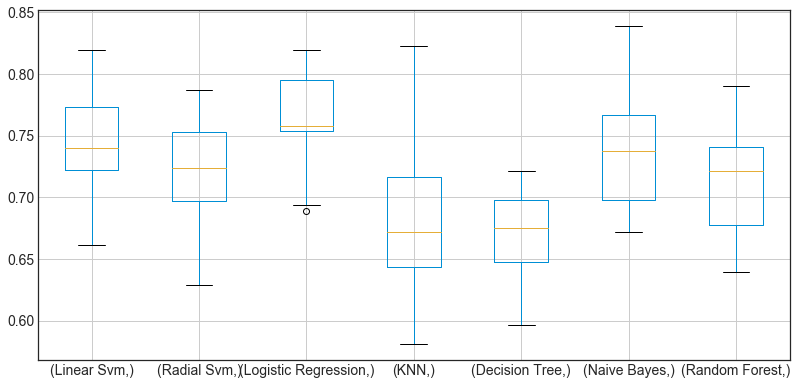

In [66]:
plt.subplots(figsize=(12,6))
box=pd.DataFrame(accuracy,index=[classifiers])
box.T.boxplot()

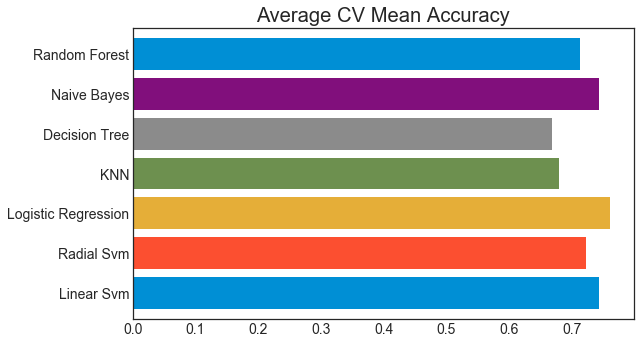

In [67]:
new_models_dataframe2['CV Mean'].plot.barh(width=0.8)
plt.title('Average CV Mean Accuracy')
fig=plt.gcf()
fig.set_size_inches(8,5)
plt.show()

The classification accuracy can be sometimes misleading due to imbalance. We can get a summarized result with the help of confusion matrix, which shows where did the model go wrong, or which class did the model predict wrong.

### Confusion Matrix

It gives the number of correct and incorrect classifications made by the classifier.

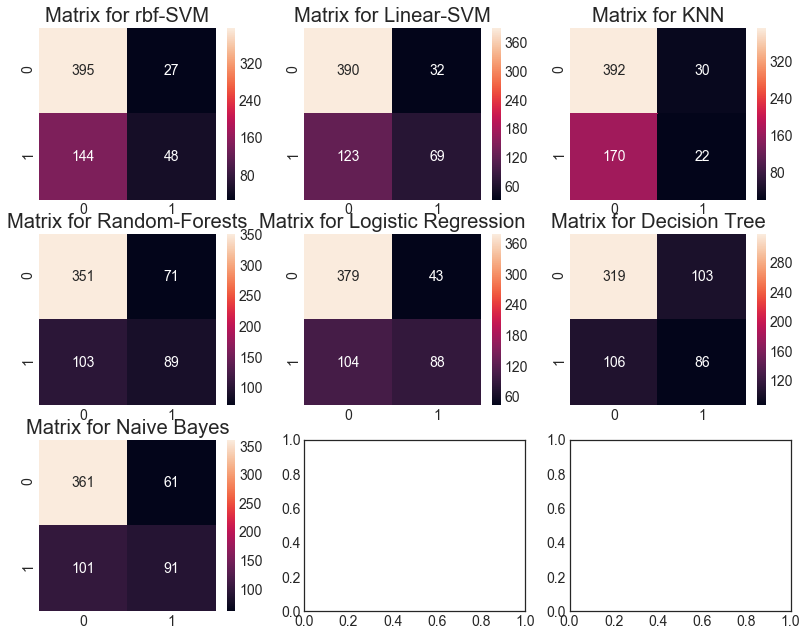

In [68]:
f,ax=plt.subplots(3,3,figsize=(12,10))
y_pred = cross_val_predict(svm.SVC(kernel='rbf'),X,Y,cv=10)
sns.heatmap(confusion_matrix(Y,y_pred),ax=ax[0,0],annot=True,fmt='2.0f')
ax[0,0].set_title('Matrix for rbf-SVM')
y_pred = cross_val_predict(svm.SVC(kernel='linear'),X,Y,cv=10)
sns.heatmap(confusion_matrix(Y,y_pred),ax=ax[0,1],annot=True,fmt='2.0f')
ax[0,1].set_title('Matrix for Linear-SVM')
y_pred = cross_val_predict(KNeighborsClassifier(n_neighbors=9),X,Y,cv=10)
sns.heatmap(confusion_matrix(Y,y_pred),ax=ax[0,2],annot=True,fmt='2.0f')
ax[0,2].set_title('Matrix for KNN')
y_pred = cross_val_predict(RandomForestClassifier(n_estimators=100),X,Y,cv=10)
sns.heatmap(confusion_matrix(Y,y_pred),ax=ax[1,0],annot=True,fmt='2.0f')
ax[1,0].set_title('Matrix for Random-Forests')
y_pred = cross_val_predict(LogisticRegression(),X,Y,cv=10)
sns.heatmap(confusion_matrix(Y,y_pred),ax=ax[1,1],annot=True,fmt='2.0f')
ax[1,1].set_title('Matrix for Logistic Regression')
y_pred = cross_val_predict(DecisionTreeClassifier(),X,Y,cv=10)
sns.heatmap(confusion_matrix(Y,y_pred),ax=ax[1,2],annot=True,fmt='2.0f')
ax[1,2].set_title('Matrix for Decision Tree')
y_pred = cross_val_predict(GaussianNB(),X,Y,cv=10)
sns.heatmap(confusion_matrix(Y,y_pred),ax=ax[2,0],annot=True,fmt='2.0f')
ax[2,0].set_title('Matrix for Naive Bayes')
plt.subplots_adjust(hspace=0.2,wspace=0.2)
plt.show()

### Interpreting Confusion Matrix

The left diagonal shows the number of correct predictions made for each class while the right diagonal shows the number of wrong prredictions made. Lets consider the first plot for rbf-SVM:

1)The no. of correct predictions are **395(for non-defaulters) + 48(for defaulters)** with the mean CV accuracy being **((395+48)/(395+48+27+144)) * 100 = 72.1%** which we did get earlier.

2)**Errors**-->  Wrongly Classified 27 non-defaulters as defaulters and 144 defaulters as non-defaulters. Thus it has made more mistakes by predicting defaulters as non-defaulters compared to Naive Bayes model

By looking at all the matrices, we can say that rbf-SVM has a higher chance in correctly predicting non-defaulters customers but NaiveBayes has a higher chance in correctly predicting customers who default.

>**For purposes on this tutorial I will not proceed to hyper parameter tuning or ensembling**

### 2. Hyper-Parameters Tuning

The machine learning models are like a Black-Box. There are some default parameter values for this Black-Box, which we can tune or change to get a better model. Like the C and gamma in the SVM model and similarly different parameters for different classifiers, are called the hyper-parameters, which we can tune to change the learning rate of the algorithm and get a better model. This is known as Hyper-Parameter Tuning.

### 3.Ensembling

Ensembling is a good way to increase the accuracy or performance of a model. In simple words, it is the combination of various simple models to create a single powerful model.

Lets say we want to buy a phone and ask many people about it based on various parameters. So then we can make a strong judgement about a single product after analysing all different parameters. This is **Ensembling**, which improves the stability of the model. Ensembling can be done in ways like:

**1)Voting Classifier** - It is the simplest way of combining predictions from many different simple machine learning models. It gives an average prediction result based on the prediction of all the submodels. The submodels or the basemodels are all of diiferent types.

**2)Bagging - Bagging** is a general ensemble method. It works by applying similar classifiers on small partitions of the dataset and then taking the average of all the predictions. Due to the averaging,there is reduction in variance. Unlike Voting Classifier, Bagging makes use of similar classifiers.

**3)Boosting** - Boosting is an ensembling technique which uses sequential learning of classifiers. It is a step by step enhancement of a weak model.Boosting works as follows:

A model is first trained on the complete dataset. Now the model will get some instances right while some wrong. Now in the next iteration, the learner will focus more on the wrongly predicted instances or give more weight to it. Thus it will try to predict the wrong instance correctly. Now this iterative process continous, and new classifers are added to the model until the limit is reached on the accuracy.

---

## Feature Importance

---

### Thanks a lot for your time.

---